## Project Overview
This project involves predicting passenger survival on the Titanic using machine learning. The workflow includes loading data, visualizing key statistics, preprocessing data with custom transformers, training various classifiers, and evaluating their performance. A GradientBoosting model is fine-tuned with GridSearchCV for improved accuracy, and predictions are made for a test dataset and saved for future use.

## Import Libraries
---

In [301]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Data Loading and First Look
---

In [272]:
# Reading the Titanic dataset
titanic_data = pd.read_csv('./titanic/train.csv')
# Displaying the first 3 rows of the dataset
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [299]:
# Getting information about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  C            891 non-null    float64
 13  S            891 non-null    float64
 14  Q            891 non-null    float64
 15  N            891 non-null    float64
 16  Male         891 non-null    float64
 17  Female       891 non-null    float64
dtypes: float64(8), int64(5), object(5)
memory usage: 1

In [274]:
# Statistical description of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization
---

### Correlation Analysis (Heatmap)
Visualizing the distribution and relationships of features

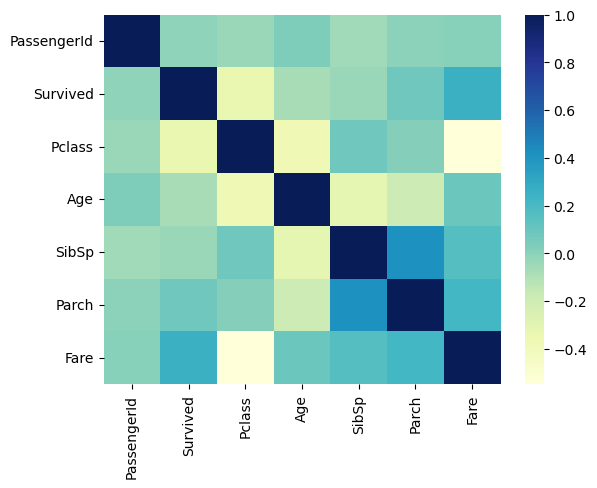

In [275]:
# Selecting numeric data for correlation analysis
numeric_data = titanic_data.select_dtypes(include=[np.number])
# Plotting heatmap for correlation analysis
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

### Histograms Distribution of Age


/Users/khaledalrashidi/anaconda3/envs/ee541_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


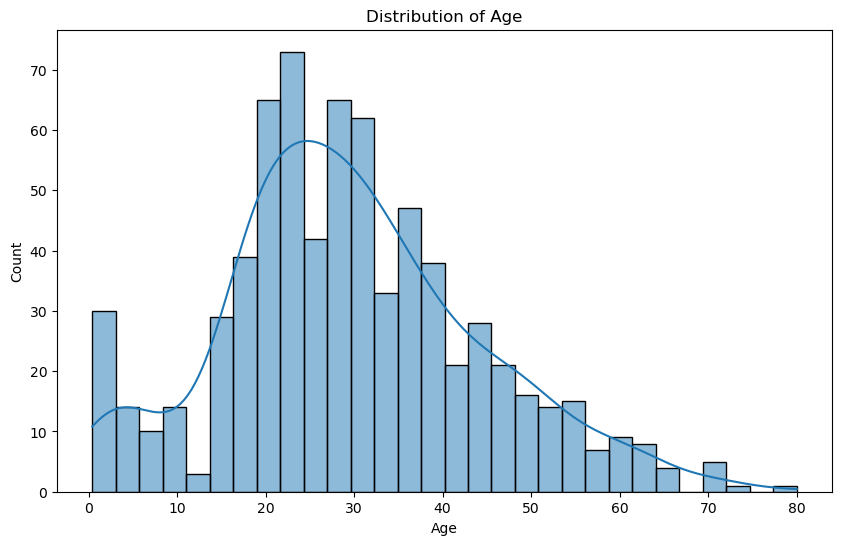

In [276]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

### Histogram Distribution of Passenger Class

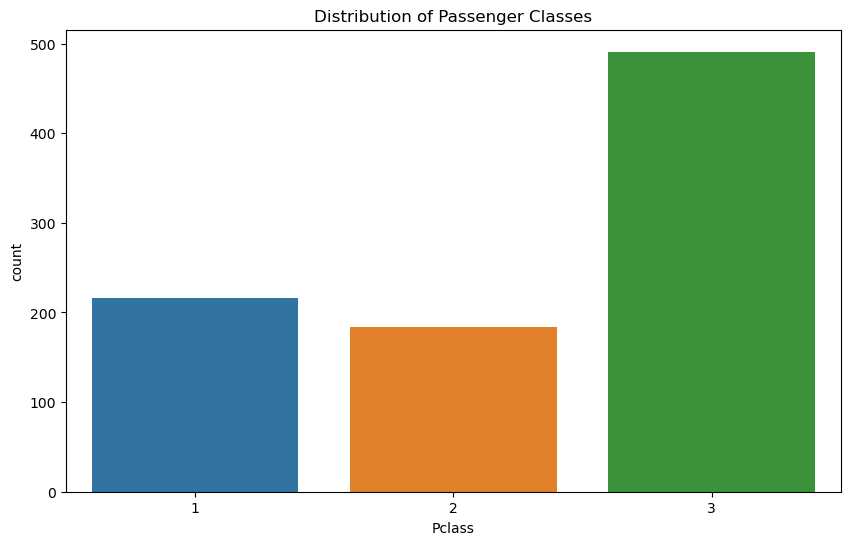

In [277]:
# Distribution of Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_data, x='Pclass')
plt.title('Distribution of Passenger Classes')
plt.show()

### Histograms Distribution of Sex

/Users/khaledalrashidi/anaconda3/envs/ee541_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


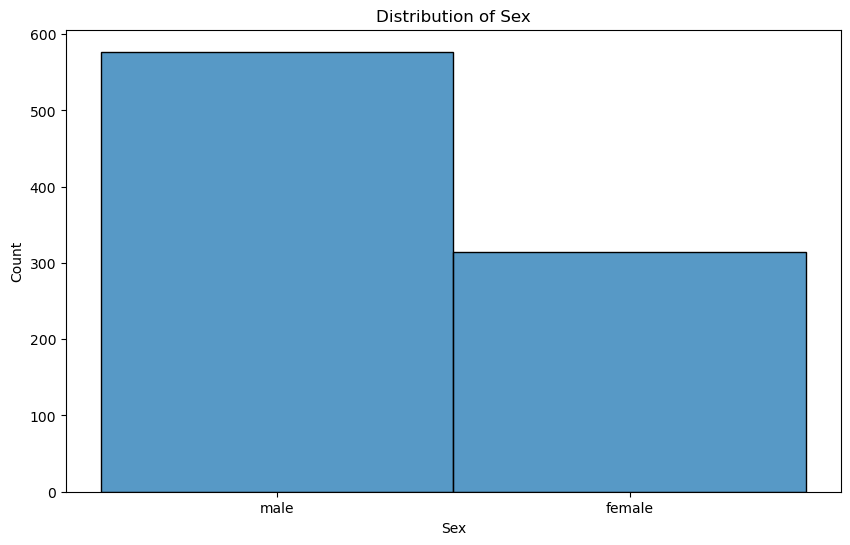

In [278]:
# Distribution of Sex
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Sex')
plt.title('Distribution of Sex')
plt.show()

## Survival Rate Analysis
---

### Survival Rate by Sex

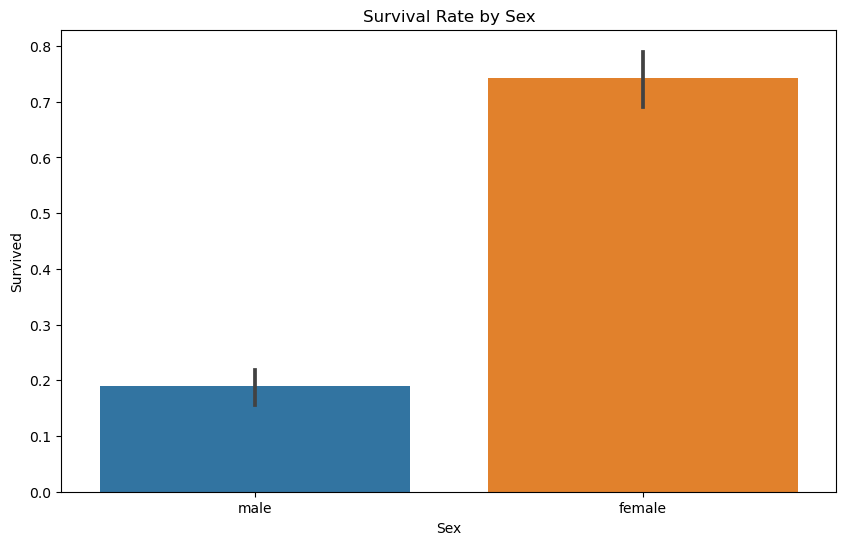

In [279]:
# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Sex')
plt.show()

### Survival Rate by Class

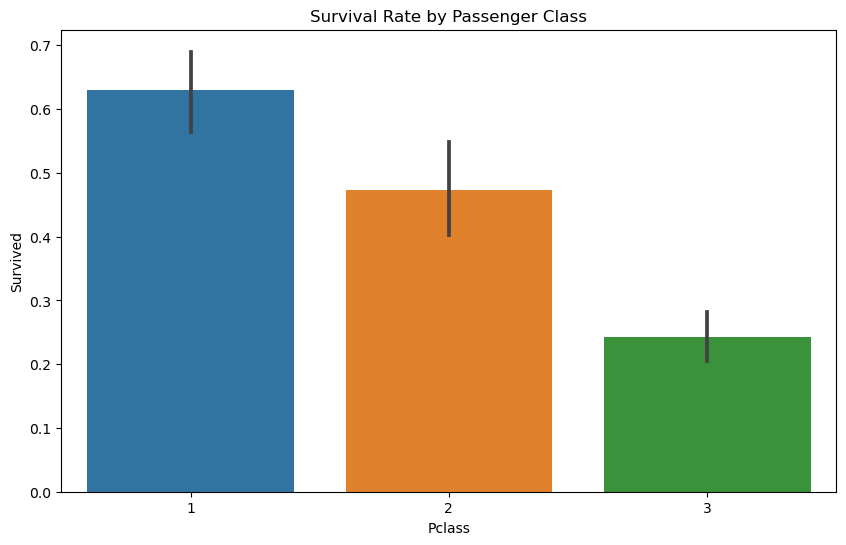

In [328]:
# Survival rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [300]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  C            891 non-null    float64
 13  S            891 non-null    float64
 14  Q            891 non-null    float64
 15  N            891 non-null    float64
 16  Male         891 non-null    float64
 17  Female       891 non-null    float64
dtypes: float64(8), int64(5), object(5)
memory usage: 1

## Data Processing
---

### 1. Handling Missing 'Age' Values: We fill in missing values in the 'Age' column with the column's mean, ensuring a consistent dataset without introducing significant bias.

In [282]:
# Creating a class for imputing age
class AgeImputer(BaseEstimator, TransformerMixin):
    # Function to fit the imputer
    def fit(self, X, y=None):
        return self
    
    # Function to transform the data by imputing age
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[['Age']])
        return X

### 2. One-Hot Encoding of Categorical Variables: The categorical 'Sex' and 'Embarked' columns are transformed into numerical format using One-Hot Encoding, which is essential for machine learning model processing.

In [283]:
# Creating a class for encoding categorical features
class FeatureEncoder(BaseEstimator, TransformerMixin):
    # Function to fit the encoder
    def fit(self, X, y=None):
        return self
    
    # Function to transform the data by encoding features
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Male", "Female"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

### 3. Dropping Unnecessary Columns: Columns like 'Cabin', 'Name', 'Ticket', and the original 'Sex' (post-encoding) are dropped to focus the model on relevant predictors and reduce overfitting risk.

In [284]:
# Creating a class for dropping unnecessary features
class FeatureDropper(BaseEstimator, TransformerMixin):
    # Function to fit the dropper
    def fit(self, X, y=None):
        return self
    
    # Function to transform the data by dropping features
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

### Create a pipeline for all the data processing steps. This way we can resue it later (quickly) 

In [285]:
# Creating a pipeline for data preprocessing
pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featureDropper", FeatureDropper())])

In [286]:
# Applying the pipeline to the training data
titanic_set = pipeline.fit_transform(titanic_data)
titanic_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   C            891 non-null    float64
 8   S            891 non-null    float64
 9   Q            891 non-null    float64
 10  Male         891 non-null    float64
 11  Female       891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


## Preparing the Dataset for Model Training
---

### Split the Dataset into Train and Test Set (Using Stratified)

In [ ]:
# Splitting the data into train and test sets in a stratified manner
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_set, titanic_set[["Survived", "Pclass", "Male", "Female"]]):
    strat_train_set = titanic_set.loc[train_indices]
    strat_test_set = titanic_set.loc[test_indices]

# Visualizing histograms for training and testing data
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [288]:
# Separating features and target variable
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

# Standardizing the feature data
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [289]:
# Preprocessing the test set
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

# Standardizing the test set
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

## Model Training and Selection
---

### Models: Random Forest, Gradient Boosting, Decision Tree, Logistic Regression, Perceptron, SVC, K-Neighbors


In [324]:
# Initializing and training different models

# Data setup
X_train, X_test, y_train, y_test = X_data, X_data_test, y_data, y_data_test

# Dictionary of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'K-Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

# Fit, predict and evaluate each model
for name, model in models.items():
    # Fit the model on your training data
    model.fit(X_train, y_train)

    # Predict the labels for the test set
    predictions = model.predict(X_test)

    # Evaluate the model on the test set
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy of {name}: {accuracy:.2f}")


Accuracy of Random Forest: 0.80
Accuracy of Logistic Regression: 0.80
Accuracy of SVC: 0.81
Accuracy of K-Neighbors: 0.78
Accuracy of Gradient Boosting: 0.83
Accuracy of Decision Tree: 0.76


### Visualizing model accuracies

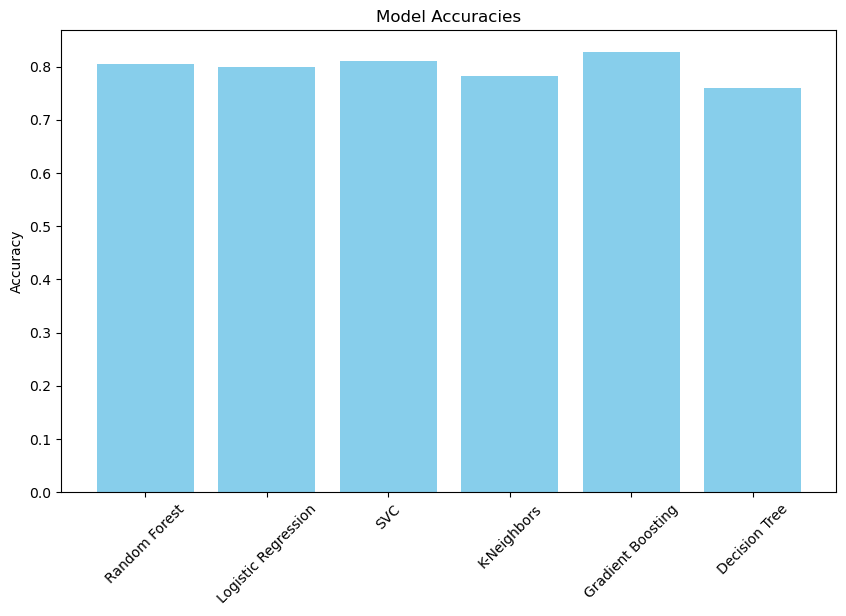

In [315]:
# Store accuracies for plotting
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, predictions)

# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

### Confusion Matrices for Each Model

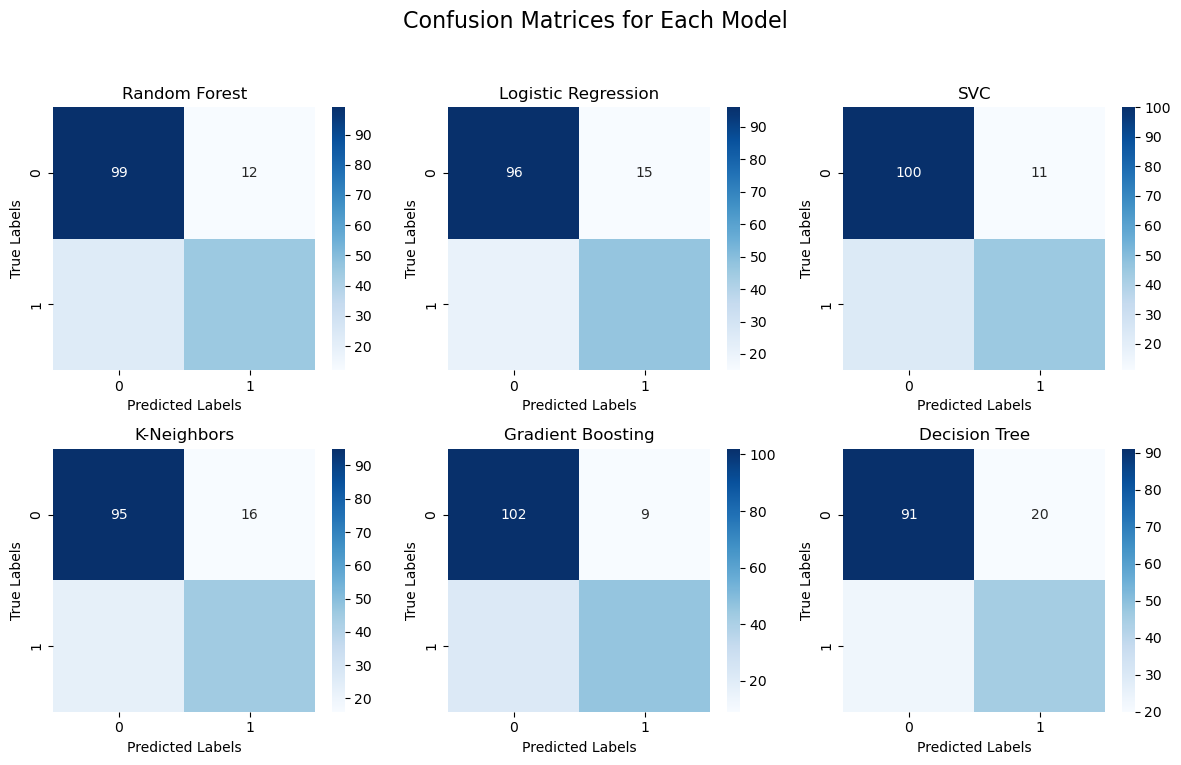

In [325]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle('Confusion Matrices for Each Model', fontsize=16)

for ax, (name, model) in zip(axes.flatten(), models.items()):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(name)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Precision-recall Curves for Each Model

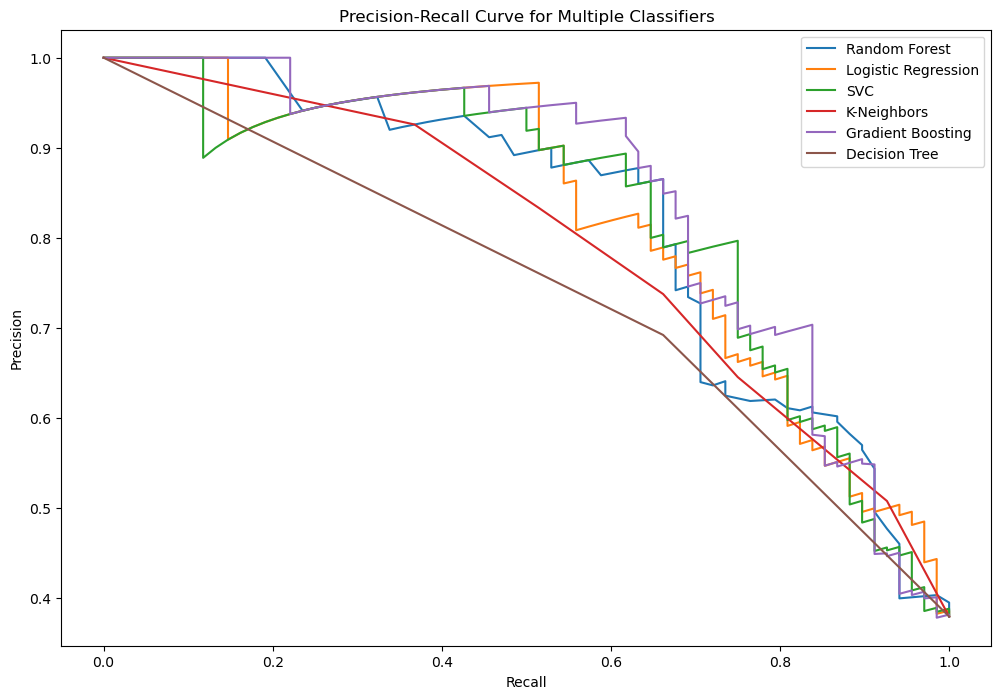

In [310]:
# Preparing to plot precision-recall curves for each model
plt.figure(figsize=(12, 8))

for name, model in models.items():
    # Predict probabilities for the test set
    # Note: Some models like SVC need probability=True in their constructor to use predict_proba
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    else:
        # For models that don't have predict_proba (like SVC with default settings), use decision function
        proba = model.decision_function(X_test)

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, proba)

    # Plot the precision-recall curve
    plt.plot(recall, precision, label=name)

plt.title('Precision-Recall Curve for Multiple Classifiers')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

## Train the Model (Gradient Boosting) on the Dataset
---

The Gradient Boosting had the highest accuract rate out of the selected models, so we'll train it on the enitre dataset. Before that, we'll perform a grid search for hyperparamter tuning.

In [318]:
final_data = pipeline.fit_transform(titanic_data)
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

# Standardizing the full dataset
scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

# Gradient Boosting parameter grid
gb_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3],
    "subsample": [0.8, 0.9, 1.0],
    "max_features": ['sqrt', 'log2', None]
}

# Gradient Boosting
# Training the final model on the full dataset
final_gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(final_gb, gb_param_grid, cv=5, scoring="accuracy", return_train_score=True, n_jobs=-1)
grid_search_gb.fit(X_data_final, y_data_final)

# Selecting the best model
final_gb = grid_search_gb.best_estimator_
final_gb

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV 3/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=0.836, test=0.809) total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=0.822, test=0.698) total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=0.833, test=0.837) total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=0.835, test=0.826) total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9;, score=(train=0.832, test=0.820

GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=2,
                           n_estimators=300, random_state=42, subsample=0.8)

In [319]:
selected_params = grid_search_gb.best_estimator_.get_params()
print(selected_params)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.8, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


## Evaluating the Best Model on the Test Set
---

In [320]:
# Reading the test data
titanic_test_data = pd.read_csv("titanic/test.csv")
# Preprocessing the test data
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Male         418 non-null    float64
 10  Female       418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


### Making predictions with the best model

In [321]:
# Filling missing values and standardizing the final test data
X_final_test = final_test_data.fillna(method="ffill")
X_data_final_test = scaler.fit_transform(X_final_test)

# Predicting survival on the test set
predictions = final_gb.predict(X_data_final_test)

/var/folders/ps/bsyj9bqj7110t7m59qgl73l40000gn/T/ipykernel_59341/1406433126.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = final_test_data.fillna(method="ffill")


### Exporting the predictions to a CSV file

In [322]:
# Creating a DataFrame for predictions and exporting it
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("titanic/predictions.csv", index=False)

In [323]:
# Displaying the final DataFrame
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Conclusion
This project involves predicting passenger survival on the Titanic using machine learning. Key steps, from data preprocessing to model optimization, were crucial in enhancing predictive accuracy. The final model demonstrated the project's potential to make informed predictions, reflecting the importance of a structured approach in data science. This work illustrates the iterative nature of developing robust predictive models and the critical role of hyperparameter tuning in refining model performance.

I hope you find it useful. Please let me know if you have any feedback or questions. Thank you!